### Update the weights to reduce loss
<br>

#### w1 = w1 - *learning rate* * d/dw1

learning rate is about 0.1

-----

- ### Batch Gradient Descent
    - #### Going through all training samples for a forward pass and adjust weights (in 1 epoch)
    - #### Good for small amount of samples
- ### Stochastic Gradient Descent
    - #### Use one ramdom sample for a forward pass and adjust weights
    - #### Good for large amount of samples
- ### Mini batch Gradient Descent
    - #### Use a batch of ramdom samples for a forward pass and adjust weights
    - #### Intermediate solution 
    
    

In [291]:
import os
import random
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline

In [292]:
df = pd.read_csv(f"{os.path.dirname(os.path.abspath('__file__'))}\\5_homeprices_banglore.csv")
df.sample(10)

,area,bedrooms,price
19,800,1,32.0
14,2250,3,101.0
3,1521,3,75.0
17,1540,3,60.0
6,2732,4,135.0
8,1310,3,50.0
16,1180,3,48.0
9,3700,5,167.0
2,1440,3,62.0
4,1200,2,51.0


In [293]:
# Preprocesing
sx, sy = preprocessing.MinMaxScaler(), preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop("price", axis="columns"))
scaled_y = sy.fit_transform(df["price"].values.reshape(df.shape[0], 1))
print(scaled_X, scaled_y)

[[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]] [[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]
 [0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]
 [0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]
 [0.51851852]
 [0.        ]]


In [294]:
# transpose is just r -> c, c -> r
print(scaled_X)
print(scaled_X.T)

[[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]]
[[0.08827586 0.62068966 0.22068966 0.24862069 0.13793103 0.12758621
  0.6662069  0.86206897 0.17586207 1.         0.34482759 0.68448276
  0.06896552 0.10344828 0.5        0.12931034 0.13103448 0.25517241
  0.67931034 0.        ]
 [0.25       0.75       0.5        0.5        0.25       0.25
  0.75       0.75       0.5        1.         0.5        0.75
  0.25       0.25       0.5        0.25       0.5        0.5
  0.5        0.        ]]


In [295]:
# batch gradient descent
def batchGD(X, y_actual, epochs, learning_rate=0.01):
    num_of_features = X.shape[1]

    w = np.ones(shape=num_of_features)
    b = 0
    tot_samples = X.shape[0]

    lost_list, epoch_list = [], []

    for i in range(epochs):
        y_predicted = np.dot(w, scaled_X.T) + b

        # calculate gradient (partial derivative)
        w_grad = -(2 / tot_samples) * X.T.dot(y_actual - y_predicted)
        b_grad = -(2 / tot_samples) * np.sum(y_actual - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        # mean square error
        lost = np.mean(np.square(y_actual - y_predicted))

        if i % 10 == 0:
            lost_list.append(lost)
            epoch_list.append(i)

    return w, b, lost, lost_list, epoch_list

w, b, lost, lost_list, epoch_list = batchGD(scaled_X, scaled_y.reshape(scaled_y.shape[0]), 5000)
w, b, lost

(array([0.75542854, 0.41583882]), -0.11684836015389075, 0.0034259177049509168)

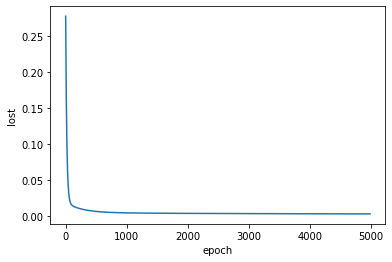

In [296]:
plt.xlabel("epoch")
plt.ylabel("lost")
plt.plot(epoch_list, lost_list)

In [297]:
# scaling samples
sx.transform([[2600, 4]])

array([[0.62068966, 0.75      ]])

In [298]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]

    # using weight function to calculate scaled price
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b

    # transform scaled price to actual price
    return sy.inverse_transform([[scaled_price]])[0][0]

for i in range(10):
    print(predict(df["area"][i], df["bedrooms"][i], w, b), df["price"][i])

39.26265570352689 39.07
121.62885338709971 120.0
66.8011521561972 62.0
69.64963873743021 75.0
44.32663184794111 51.0
43.27163681785481 38.0
126.27083151947943 135.0
146.24540408911326 155.0
62.22950702582326 50.0
174.34656455782965 167.0


In [299]:
# stochastic gradient descent
def stochasticGD(X, y_actual, epochs, learning_rate=0.01):
    num_of_features = X.shape[1]

    w = np.ones(shape=num_of_features)
    b = 0
    tot_samples = X.shape[0]

    lost_list, epoch_list = [], []

    for i in range(epochs):
        random_index = random.randint(0, tot_samples - 1)
        samp_X, samp_y = X[random_index], y_actual[random_index]
        y_predicted = np.dot(w, samp_X.T) + b

        # calculate gradient
        w_grad = -(2 / tot_samples) * samp_X.T.dot(samp_y - y_predicted)
        b_grad = -(2 / tot_samples) * (samp_y - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        # mean square error
        lost = np.mean(np.square(samp_y - y_predicted))

        if i % 10 == 0:
            lost_list.append(lost)
            epoch_list.append(i)

    return w, b, lost, lost_list, epoch_list

w_sgd, b_sgd, lost_sgd, lost_list_sgd, epoch_list_sgd = stochasticGD(scaled_X, scaled_y.reshape(scaled_y.shape[0]), 100000)

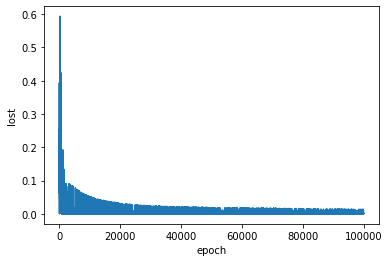

In [300]:
plt.xlabel("epoch")
plt.ylabel("lost")
plt.plot(epoch_list_sgd, lost_list_sgd)

In [301]:
# mini batch gradient descent
def MBGD(X, y_actual, epochs, batch_size=5, learning_rate=0.01):
    num_of_features = X.shape[1]

    w = np.ones(shape=num_of_features)
    b = 0
    tot_samples = X.shape[0]
    if batch_size > tot_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = tot_samples

    lost_list, epoch_list = [], []
    num_batches = tot_samples // batch_size

    for i in range(epochs):
        random_indices = np.random.permutation(tot_samples) # return a shuffled nparray from 0 to total samples
        X_tmp = X[random_indices]
        y_tmp = y_actual[random_indices]

        for j in range(0, tot_samples, batch_size):
            Xj = X_tmp[j:j + batch_size]
            yj = y_tmp[j:j + batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2 / len(Xj)) * (Xj.T.dot(yj - y_predicted))
            b_grad = -(2 / len(Xj)) * np.sum(yj - y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            lost = np.mean(np.square(yj - y_predicted)) # MSE (Mean Squared Error)

        if i % 10 == 0:
            lost_list.append(lost)
            epoch_list.append(i)

    return w, b, lost, lost_list, epoch_list

w_mbgd, b_mbgd, lost_mbgd, lost_list_mbgd, epoch_list_mbgd = MBGD(scaled_X, scaled_y.reshape(scaled_y.shape[0]), 1200)

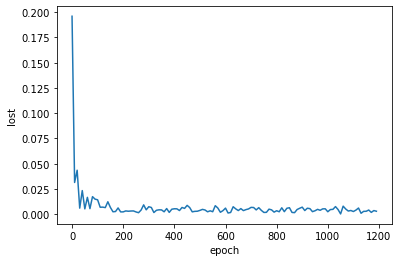

In [302]:
plt.xlabel("epoch")
plt.ylabel("lost")
plt.plot(epoch_list_mbgd, lost_list_mbgd)

In [303]:
# 5,000 (bgd) vs 1,200 (mbgd) vs 100,000 (sgd) epochs, similar result
print(w_sgd, b_sgd, lost_sgd, predict(df["area"][0], df["bedrooms"][0], w_sgd, b_sgd), df["price"][0])
print(w_mbgd, b_mbgd, lost_mbgd, predict(df["area"][0], df["bedrooms"][0], w_mbgd, b_mbgd), df["price"][0])
print(w, b, lost, predict(df["area"][0], df["bedrooms"][0], w, b), df["price"][0])

[0.7546536  0.41473133] -0.11625449442749612 2.81387129230916e-06 39.29621469411464 39.07
[0.75089455 0.42176806] -0.11795721017761268 0.006604769462723414 39.2590401060901 39.07
[0.75542854 0.41583882] -0.11684836015389075 0.0034259177049509168 39.26265570352689 39.07
